### Ford GoBike System Data Exploration

*An investigation of individual rides made in a bike-sharing system covering the greater San Francisco Bay Area by James Bimler*

### Introduction: 

Embarking on an exploration of individual rides within a bike-sharing system across the greater San Francisco Bay Area, this data analysis project seeks to uncover insights through comprehensive visualizations. By scrutinizing patterns and trends in bike rides, we aim to provide a nuanced understanding of user behavior and system dynamics. 

 

Objectives: 

1. **Univariate Exploration:** 

   - Create a histogram to visualize the distribution of a selected variable (e.g., ride duration). 

 

   - Create a bar chart to illustrate the frequency or counts of categorical variables (e.and, user type or day of the week). 

 

2. **Bivariate Exploration:** 

   - Develop a scatter plot to explore relationships between two continuous variables (e.g., ride duration and start hour). 

 

   - Construct a box plot to visualize the distribution and central tendency of a continuous variable across different categories (e.g., user type). 

 

   - Generate a heatmap to reveal patterns and correlations between two continuous variables (e.g., start hour and ride duration). 

 

3. **Multivariate Exploration:** 

   - Create a facet plot to delve into the relationships between three variables, considering facets or subplots. 

 

   - Develop a scatter plot with multiple encodings, utilizing different shapes and potentially colors for enhanced information representation. 

 

Methodology: 

Leveraging the Pandas, NumPy, and Matplotlib packages, this analysis employs a visualization-centric approach. The dataset undergoes preliminary cleaning and exploration to ensure data integrity. The outlined visualizations encompass univariate, bivariate, and multivariate perspectives, providing a comprehensive view of the bike-sharing system's dynamics. 

 

Significance: 

This project holds significance in unraveling the intricacies of bike-sharing behavior, offering actionable insights for system optimization and user experience enhancement. The commitment lies in delivering a visualization-driven analysis characterized by accuracy, clarity, and a dedication to revealing meaningful patterns in individual rides across the Bay Area. 

 

To commence the analysis, the next step involves importing essential packages and initiating the exploratory visualizations. 

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

Below I will create a versatile function that allows me to inspect essential information from the dataframe, facilitating a comprehensive understanding of the necessary cleaning and manipulation tasks. This function efficiently captures the dataframe's shape, identifies duplicated rows, and provides general information using .info(), minimizing the need for redundant calculations. The resulting variable, named 'display_dataframe_properties,' prints key properties such as shape, duplicated rows count, data types, and missing values for each column.

In [164]:
def display_dataframe_properties(df): 
    ''' 
    INPUT: 
    df (DataFrame) - dataframe to display properties 
    OUTPUT: 
    Print key properties of the dataframe: shape, duplicated rows count, 
    data types, and missing values for each column. 
    ''' 
    # Calculate the shape and number of duplicated rows once 
    shape_info = f'Shape: {df.shape}'
    duplicated_info = f'Duplicated rows: {sum(df.duplicated())}'
    
    # Data types and missing values for each column 
    info_str = df.info() 
    
    # Print the information 
    print(shape_info) 
    print(duplicated_info) 
    print(info_str) 
    print('\n') 

Lets begin to exploring our dataset

In [165]:
# load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [166]:
display_dataframe_properties(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**This dataset spans the year 2019, encompassing over 18,000 rows of data. Upon closer examination, I've identified several data-related issues that necessitate my attention:**
 

First, there are multiple columns that are irrelevant to the questions at hand, and my plan is to remove them. The 'start_time' column is presently formatted as a string and requires conversion to a datetime object. I aim to extract the time of day from the 'start_time' column and categorize these values into three distinct bins: Morning, Afternoon, and Night. Additionally, I intend to introduce a 'duration_min' column, enhancing visualization in subsequent analyses. Lastly, for improved readability, I plan to reorganize the columns. 

## Data Cleaning

In [167]:
# make a copy of the original dataframe
df = df.copy()

In [168]:
# take only the columns that are of interest to this project
df = df[df.columns[[0, 1, 4, 8, 12, 13, 14]]]

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        183412 non-null  int64  
 1   start_time          183412 non-null  object 
 2   start_station_name  183215 non-null  object 
 3   end_station_name    183215 non-null  object 
 4   user_type           183412 non-null  object 
 5   member_birth_year   175147 non-null  float64
 6   member_gender       175147 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.8+ MB


In [170]:
# Assign proper data types to the start_time 
df['start_time'] = pd.to_datetime(df['start_time']) 
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

# Extract day of the week 
df['day_of_week'] = df['start_time'].dt.strftime('%A') 

# Extract the time of the day 
df['start_hour'] = df['start_time'].dt.hour 
df['time_of_day'] = pd.cut(df['start_hour'], bins=[0, 11, 17, 23], labels=['Morning', 'Afternoon', 'Night'], include_lowest=True) 

# Add a variable that displays duration in minutes
df['duration_min'] = df['duration_sec'] / 60

# Display the added columns 
df.head(1)

,duration_sec,start_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,day_of_week,start_hour,time_of_day,duration_min
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,Thursday,17,Afternoon,869.75


In [171]:
# reorder the columns in the dataframe
df = df[['start_time', 'start_station_name', 'end_station_name', 'user_type', 'member_gender', 'member_birth_year',
         'day_of_week', 'time_of_day', 'start_hour', 'duration_min', 'duration_sec']]
df.head(1)

,start_time,start_station_name,end_station_name,user_type,member_gender,member_birth_year,day_of_week,time_of_day,start_hour,duration_min,duration_sec
0,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,1984,Thursday,Afternoon,17,869.75,52185


In [172]:
# Lets save a cleaned portion of the dataset for the presenation portion of this analysis
# df.to_csv(r'C:\Users\james_bimler\pandas\Udacity\Class 3\201902-fordgobike-tripdata_cleaned', index=False)

In [173]:
display_dataframe_properties(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          183412 non-null  datetime64[ns]
 1   start_station_name  183215 non-null  object        
 2   end_station_name    183215 non-null  object        
 3   user_type           183412 non-null  object        
 4   member_gender       175147 non-null  object        
 5   member_birth_year   175147 non-null  Int64         
 6   day_of_week         183412 non-null  object        
 7   time_of_day         183412 non-null  category      
 8   start_hour          183412 non-null  int64         
 9   duration_min        183412 non-null  float64       
 10  duration_sec        183412 non-null  int64         
dtypes: Int64(1), category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 14.3+ MB
Shape: (183412, 11)
Duplicated rows: 0
None

### Univariate Exploration

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day_of_week, dtype: int64

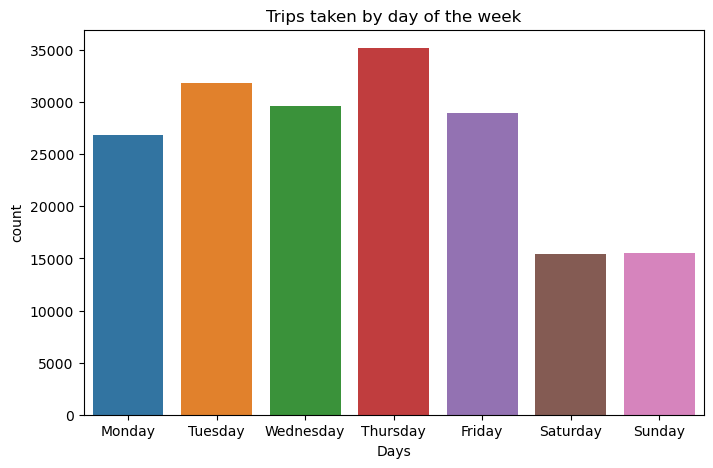

In [174]:
# Get the count of trips made on each day of the week 
display(df['day_of_week'].value_counts().sort_values(ascending=False)) 
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 

# Plot distribution of day of the week 
plt.figure(figsize=[8, 5]) 
sns.countplot(data=df, x='day_of_week', order=weekday) 
plt.title('Trips taken by day of the week') 
plt.xlabel('Days') 
plt.show()

The analysis reveals that Thursday records the highest number of trips, trailed by Tuesday and Wednesday. Understandably, Saturday and Sunday exhibit lower trip counts, aligning with their non-working day status. Subsequently, an investigation will delve into the distribution of user types and genders across different days of the week. 

The percentage count of trips made in terms of times of the day(%)
Afternoon    38.51
Morning      38.42
Night        23.07
Name: time_of_day, dtype: float64


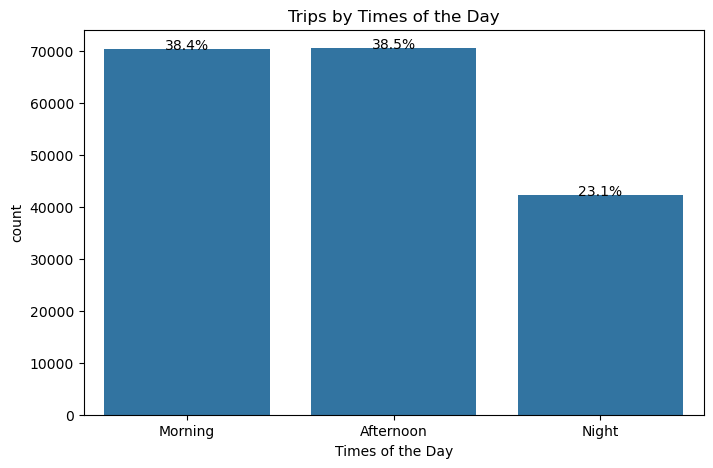

In [175]:
# Get the percentage count of trips made in terms of times of the day 
time_of_day_count = (df['time_of_day'].value_counts() / df['time_of_day'].count()) * 100 
print("The percentage count of trips made in terms of times of the day(%)") 
print(time_of_day_count.round(2).sort_values(ascending=False)) 

# Plot distribution of day of week 
plt.figure(figsize=[8, 5]) 
base_color = sns.color_palette()[0] 
sns.countplot(data=df, x='time_of_day', color=base_color) 
n_points = df.shape[0] 
user_counts = df['time_of_day'].value_counts() 
locs, labels = plt.xticks() 

# Print frequency on the bar chart 
for loc, label in zip(locs, labels): 
    count = user_counts[label.get_text()] 
    pct_string = '{:0.1f}%'.format(100 * count / n_points) 
    plt.text(loc, count - 8, pct_string, ha='center') 
plt.title('Trips by Times of the Day') 
plt.xlabel('Times of the Day') 
plt.show() 

The plot illustrates that the Afternoon (12:00 - 17:59 hours) has the highest number of trips, followed closely by the Morning (00:00 - 11:59 hours). The disparity between the trip counts during these times is minimal, which aligns with expectations as nighttime typically sees fewer rides. Further investigation will explore whether this pattern is influenced by user types (subscribers and customers). 

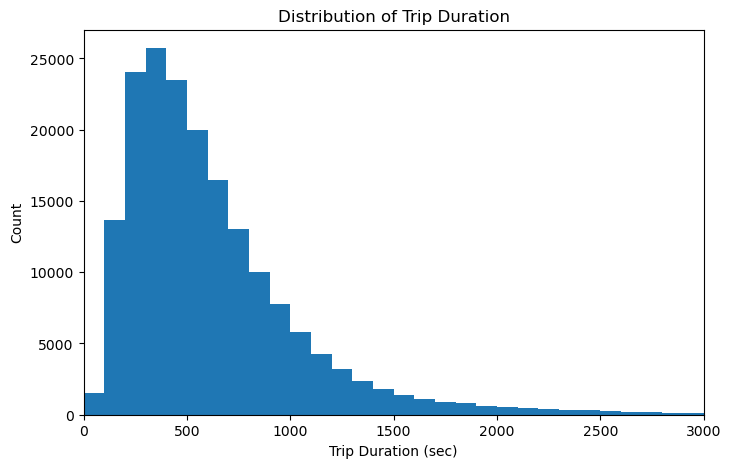

In [176]:
# Start with a standard-scaled plot 
binsize = 100 

# Find the maximum duration for setting x-axis limit 
duration_max = df['duration_sec'].max() 

# Define bins based on binsize and maximum duration 
bins = np.arange(0, duration_max + binsize, binsize) 

# Create a histogram 
plt.figure(figsize=[8, 5]) 
plt.hist(data=df, x='duration_sec', bins=bins) 
plt.xlim(0, 3000)  # Set x-axis limit dynamically based on data 
plt.xlabel('Trip Duration (sec)') 
plt.ylabel('Count') 
plt.title('Distribution of Trip Duration') 
plt.show() 

The distribution of trip durations in seconds is highly right-skewed, making it challenging to visualize. To address this, I binned the data in intervals of 100 seconds and set the x-axis limit to 3000 for better clarity.

#### Conclusions

I observed a notable relationship where the number of trips between morning and afternoon was nearly identical. This suggests a consistent pattern in trip distribution between these time periods during the day. 

The day of the week for most riders was Thursday following by Tuesday. Most customers are taking rides during Weekdays.

### Bivariate Exploration

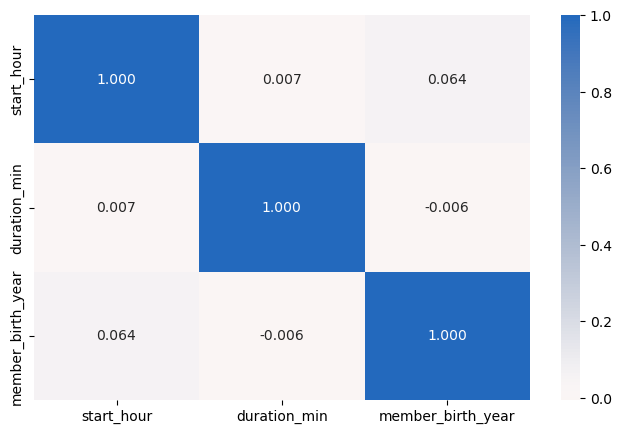

In [177]:
# Define numeric and categorical variables 
numeric_vars = ['start_hour', 'duration_min', 'member_birth_year'] 
categoric_vars = ['user_type', 'member_gender', 'day_of_week', 'time_of_day'] 

# Correlation plot for numeric variables 
plt.figure(figsize=[8, 5]) 
sns.heatmap(df[numeric_vars].corr(), annot=True, fmt='.3f', 
            cmap='vlag_r', center=0) 

# Show the plot 
plt.show() 

This code generates a heatmap to visualize the correlation among numeric variables (start hour, duration in minutes, and member birth year). The annotations on the heatmap display the correlation coefficients between pairs of numeric variables, providing insights into their relationships. 

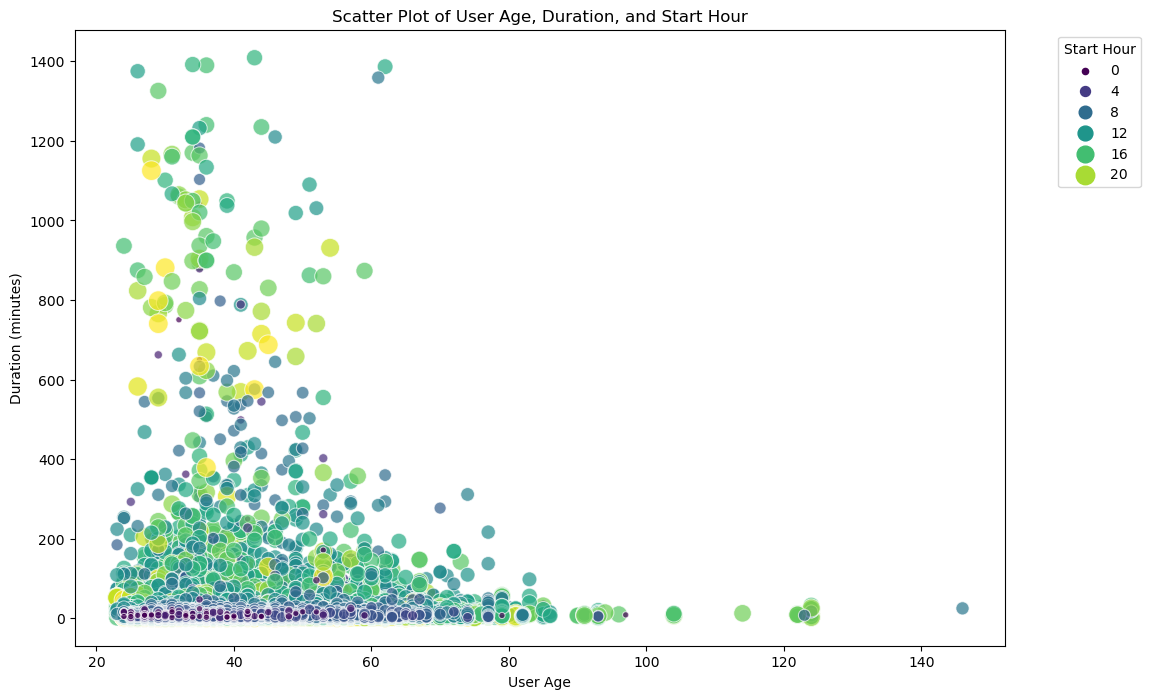

In [178]:
# Calculate user age 
df['user_age'] = 2024 - df['member_birth_year'] 

 

# Create a scatter plot with 9 boxes 
plt.figure(figsize=(12, 8)) 
sns.scatterplot(x='user_age', y='duration_min', hue='start_hour', palette='viridis', data=df, alpha=0.7, size='start_hour', sizes=(20, 200)) 
plt.title('Scatter Plot of User Age, Duration, and Start Hour') 
plt.xlabel('User Age') 
plt.ylabel('Duration (minutes)') 
plt.legend(title='Start Hour', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show() 

This code calculates the user age from the member's birth year and then creates a scatter plot, representing relationships between user age, trip duration in minutes, and start hour. The plot utilizes color (hue), size, and positioning to convey information about these variables, offering a comprehensive visualization of their interplay. 

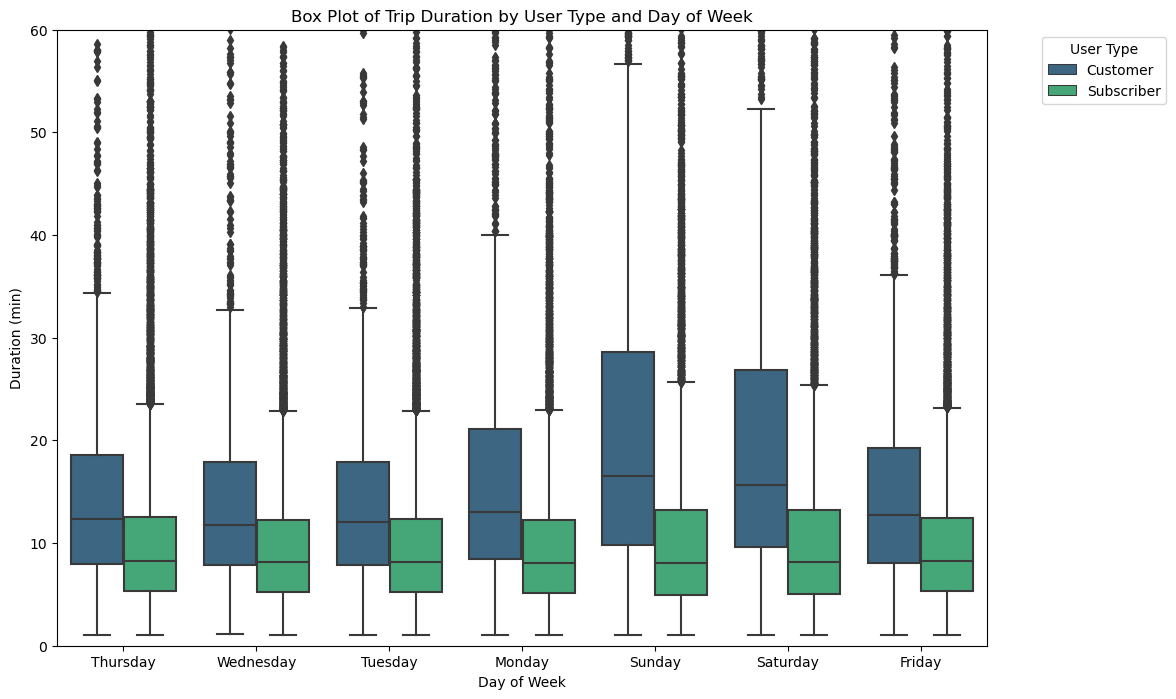

In [179]:
# Set the figure size for the plot 
plt.figure(figsize=(12, 8))  

# Create a box plot to visualize trip duration variations across user types and days of the week 
sns.boxplot(data=df, x='day_of_week', y='duration_min', hue='user_type', palette='viridis') 
plt.ylim(0, 60)  # Adjust the y-axis limits as needed 
plt.title('Box Plot of Trip Duration by User Type and Day of Week')  # Set the plot title 
plt.xlabel('Day of Week')  # Label the x-axis 
plt.ylabel('Duration (min)')  # Label the y-axis 
plt.legend(title='User Type', loc='upper right', bbox_to_anchor=(1.2, 1))  # Add legend 
plt.show() 

This code generates a box plot depicting the distribution of trip durations across different user types and days of the week. The plot provides insights into how trip durations vary, considering both user types and specific days, enhancing the understanding of temporal patterns in the dataset. The y-axis limit is adjusted for better visibility, and relevant labels and legends contribute to the plot's interpretability.

#### Conclusions

The analysis reveals notable patterns in ride durations, indicating that, on average, rides during the weekend tend to last longer compared to weekdays. While weekdays exhibit a higher volume of rides, the extended durations on weekends suggest that users might be more inclined to embark on leisurely or extended journeys during their days off. This dynamic underscores the importance of considering both the frequency and duration of rides for a comprehensive understanding of user behavior.  

Furthermore, the age distribution of users demonstrates an interesting trend. Older customers, possibly commuters or those with specific routines, tend to take rides early in the day. This finding aligns with expectations, reflecting the likelihood of older individuals using bike-sharing services for commuting or early-morning activities. The correlation between user age and ride timing provides valuable insights into the diverse preferences and usage patterns across different age groups, contributing to a nuanced understanding of the user demographic in the bike-sharing system. 

### Multivariate Exploration

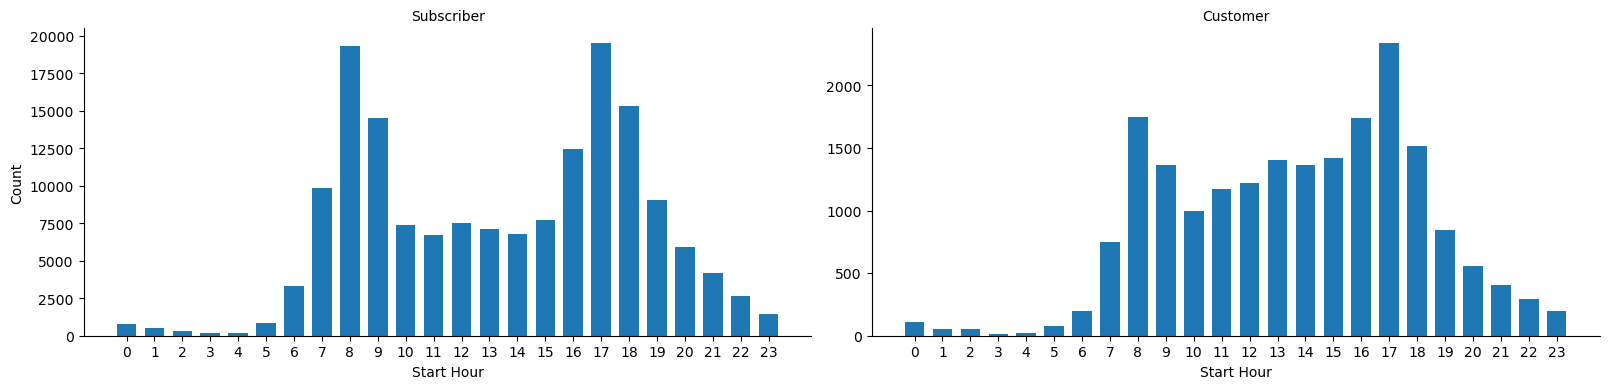

In [180]:
# Define order of user categories 
user_cat_order = df['user_type'].value_counts().index 

# Set up bin edges and create FacetGrid 
bin_edges = np.arange(-0.5, 23.5+1, 1) 
g = sns.FacetGrid(data=df, col='user_type', height=4, aspect=2, col_order=user_cat_order, sharey=False) 

# Map histograms to the grid 
g.map(plt.hist, 'start_hour', bins=bin_edges, rwidth=0.7) 

# Set labels and ticks 
g.set_axis_labels('Start Hour', 'Count') 
g.set_titles(col_template='{col_name}') 

# Adjust x-axis ticks 
g.set(xticks=np.arange(0, 23+1, 1)) 

# Display the plot 
plt.show() 

This code generates facetted histograms comparing the distribution of start hours for different user types. It uses Seaborn's FacetGrid to create separate columns for each user type, with histograms depicting the frequency of rides at different start hours. The order of user types is determined by their counts, ensuring a consistent representation. The resulting visualization allows for a clear comparison of ride distribution patterns across different user categories, providing insights into the temporal preferences of various user types in the bike-sharing system. 

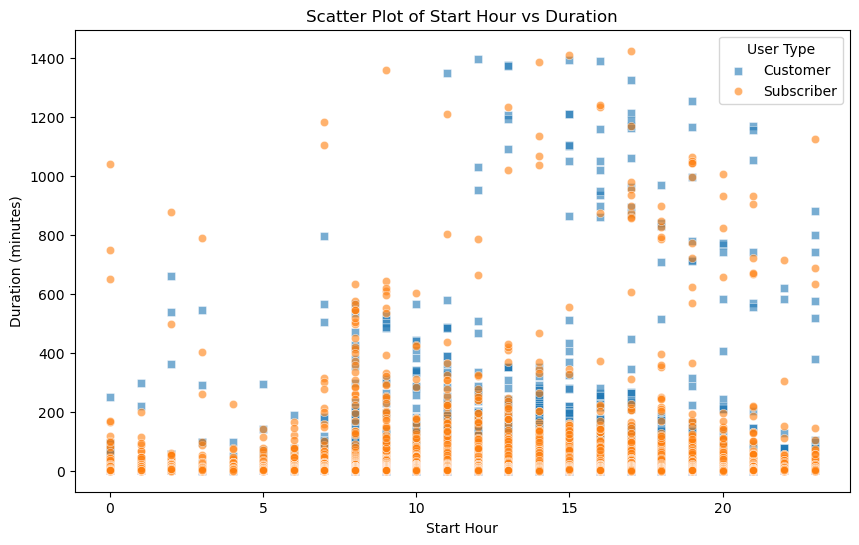

In [181]:
# Define shapes for each user type 
shapes = {'Customer': 's', 'Subscriber': 'o'} 

# Scatter plot with different shapes 
plt.figure(figsize=(10, 6)) 
for user_type, shape in shapes.items(): 
    subset = df[df['user_type'] == user_type] 
    sns.scatterplot(data=subset, x='start_hour', y='duration_min', marker=shape, label=user_type, alpha=0.6) 

# Set labels and title 
plt.xlabel('Start Hour') 
plt.ylabel('Duration (minutes)') 
plt.title('Scatter Plot of Start Hour vs Duration') 

# Show legend 
plt.legend(title='User Type') 

# Display the plot 
plt.show() 

This code creates a scatter plot to compare the relationship between the start hour and the duration of bike rides for Customer and Subscriber user types. Each user type is represented by a different shape on the plot (square for Customer, circle for Subscriber). The visualization allows for an examination of how the start hour and ride duration vary for different user types, providing insights into potential patterns or trends. The alpha parameter adjusts transparency for better visualization of overlapping points. The legend helps distinguish between the two user types, and labels and title provide context to the plot. 

#### Conclusions

In this segment of the analysis, a notable relationship emerges: subscribers predominantly utilize the bike-sharing service during peak commuting hours, suggesting a strong association with work-related travel. Conversely, customers exhibit a more consistent usage pattern throughout the day, indicating a broader range of purposes beyond the typical working hours.  

An unexpected finding is the overlapping usage patterns between subscribers and customers during specific start times, notably around typical working hours. This revelation challenges expectations, as it suggests that the service might attract customers who could potentially benefit from work-related commuting. This observation opens avenues for the ride-sharing company to explore targeted strategies to attract and engage customers seeking commuting solutions during these high-traffic periods. 

## Overall Conclusion: 

This exploration into individual rides within the Ford GoBike System across the greater San Francisco Bay Area provides valuable insights into user behavior and system dynamics. By delving into comprehensive visualizations, the analysis unveils nuanced patterns and trends, contributing to a holistic understanding of the bike-sharing landscape. 

 

Key Findings: 

 

1. **Univariate Exploration:** 

   - A consistent pattern emerges, revealing nearly identical numbers of trips between morning and afternoon. 

   - Thursdays and Tuesdays stand out as the most popular days for riders, with a notable preference for weekdays. 

 

2. **Bivariate Exploration:** 

   - Rides during weekends tend to last longer on average, suggesting users are more inclined to embark on leisurely or extended journeys during their days off. 

   - Older customers exhibit a trend of taking rides early in the day, aligning with expectations of commuting or early-morning activities. 

 

3. **Multivariate Exploration:** 

   - Subscribers predominantly use the bike-sharing service during peak commuting hours, indicating a strong association with work-related travel. 

   - Unexpectedly, overlapping usage patterns between subscribers and customers occur during specific start times around typical working hours, opening opportunities for targeted strategies to attract customer
  

Methodology: 

This project systematically explores and cleanses the data, followed by univariate, bivariate, and multivariate analyses. By leveraging statistical tools and visualization techniques, the analysis provides actionable insights into user preferences and behavior within the bike-sharing system. 


Significance: 

Our commitment lies in delivering a data-driven analysis characterized by integrity, statistical rigor, and dedication to uncovering insights. These findings empower bike-sharing service providers to make informed decisions, enhance user experience, and tailor strategies to diverse user segments, ultimately contributing to the advancement of the bike-sharing system. e advancement of the bike-sharing system. 